# Amazon Stock Predicition

## Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [2]:
dataset_train = pd.read_csv('AMZNtrain.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

### Fitting the RNN set to the Training Set

In [14]:
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0259
Epoch 2/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0036
Epoch 3/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0029
Epoch 4/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 5/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0032
Epoch 6/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0027
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 8/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0029
Epoch 9/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0027
Epoch 10/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 11/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0021
Epoch 12/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 13/100
38/38 [=====

## Making the predictions and visualising the results

### Getting the real stock price of 2019

In [17]:
dataset_test = pd.read_csv('AMZNtest.csv')
real_stock_price= dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2019

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60: i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

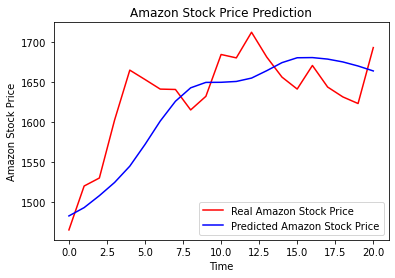

In [19]:
plt.plot(real_stock_price, color='red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()